# Perspective transform

In [1]:
# load helper functions
%run -i "0. Functions_Clases Pipeline.py"

# Load Camera calibration params
roi_images = pickle.load(open( "pickle_data/roi_images.p", "rb" ) )
und_images = pickle.load(open( "pickle_data/undistorted_images.p", "rb" ) )

[NbConvertApp] Converting notebook 0. Functions_Clases Pipeline.ipynb to script
[NbConvertApp] Writing 20331 bytes to 0. Functions_Clases Pipeline.py


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

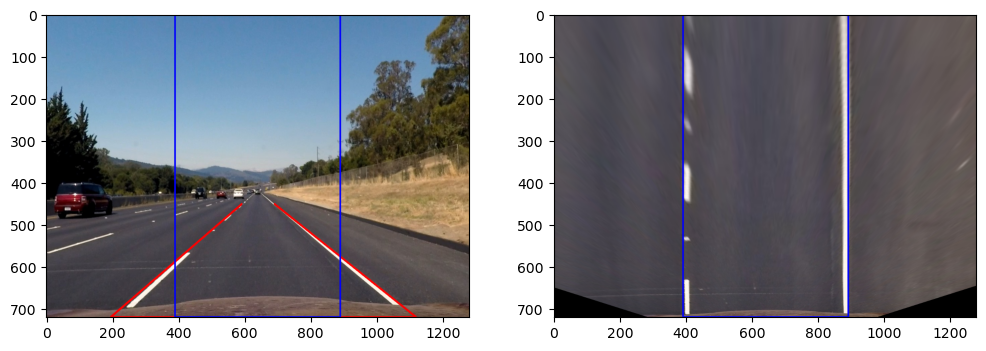

In [2]:
img = und_images[1]

#Source
# Place source points for uimage wrapping
dotS_UL=[592,450]; dotS_UR= [691,450]
dotS_LL=[195,720] ; dotS_LR= [1120,720]

src= np.array([dotS_UL,dotS_LL,dotS_LR,dotS_UR], dtype=np.float32)
# Plor src lines
out = np.copy(img)
cv2.polylines(out,np.array([src], dtype=np.int32),False,(255,0,0),thickness=4)



#Destination
hwidth = 250
offset = -0
#height = -300
height = 0

dotD_UL=[offset+(1280//2)-hwidth,height]; dotD_UR= [offset+(1280//2)+hwidth,height]
dotD_LL=[offset+(1280//2)-hwidth,720] ; dotD_LR= [offset+(1280//2)+hwidth,720]

dst= np.array([dotD_UL,dotD_LL,dotD_LR,dotD_UR], dtype=np.float32)
# Plot dst lines
cv2.polylines(out,np.array([dst], dtype=np.int32),False,(0,0,255),thickness=4)



#Compute perspective transform
M = cv2.getPerspectiveTransform(src, dst)

warped = cv2.warpPerspective(img, M, (1280,720), flags=cv2.INTER_LINEAR)
#Draw destination lines
cv2.polylines(warped,np.array([dst], dtype=np.int32),False,(0,0,255),thickness=4)

displayListImages([out,warped],cols=2,cmap='gray',figSize=[12,2])

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

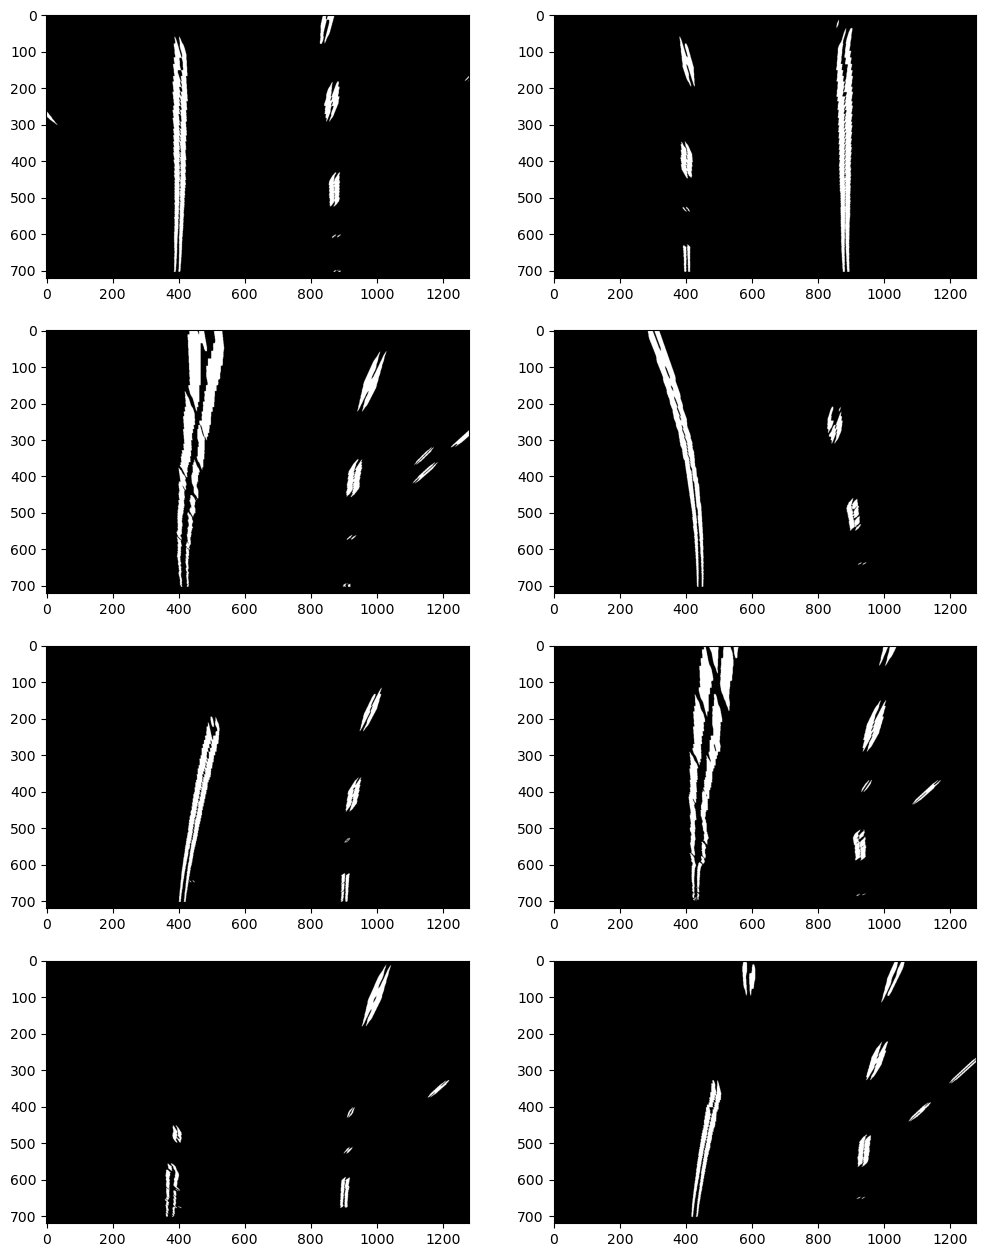

In [3]:
warped_images = []
M_values = []
Minv_values = []


for img in roi_images:
    warped_img,M, Minv = warp_image(img, hwidth = 250 ,offset = 0, height = -0, 
                                    overplotLinesDst=False, overplotLinesSrc= False )
    warped_images.append(warped_img)
    M_values.append(M)
    Minv_values.append(Minv)
    
        
displayListImages(warped_images,cols=2,cmap='gray',figSize=[12,8])

## Dump data

In [4]:
pickle.dump( [warped_images, M_values, Minv_values ], open( "pickle_data/warped_images_params.p", "wb" ) )

***

## Images Report

In [5]:
path = './output_images/'

write_name = 'imagesPT_'+str(0)+'.jpg'
cv2.imwrite(os.path.join(path , write_name), cv2.cvtColor(out, cv2.COLOR_RGB2BGR))
write_name = 'imagesPT_'+str(1)+'.jpg'
cv2.imwrite(os.path.join(path , write_name), cv2.cvtColor(warped, cv2.COLOR_RGB2BGR))

True

In [6]:
for i in range(len(roi_images)):
    write_name = 'ROIWarped_'+str(i)+'.jpg'
    
    warped_img,M, Minv = warp_image(roi_images[i], hwidth = 250 ,offset = 0, height = -300, 
                                    overplotLinesDst=True, overplotLinesSrc= False )
    cv2.imwrite(os.path.join(path , write_name), cv2.cvtColor(warped_img, cv2.COLOR_RGB2BGR))   

In [7]:
for i in range(len(und_images)):
    write_name = 'undWarped_'+str(i)+'.jpg'
    
    warped_img,M, Minv = warp_image(und_images[i], hwidth = 250 ,offset = 0, height = -0, 
                                    overplotLinesDst=True, overplotLinesSrc= False )
    cv2.imwrite(os.path.join(path , write_name), cv2.cvtColor(warped_img, cv2.COLOR_RGB2BGR))  